# Libraries

In [16]:
library(caTools)
library(ggplot2)
options(repr.plot.width=4, repr.plot.height=4)

# Read data

In [2]:
root_dir="~/Documents/Education/20170623 Udemy - Machine Learning A-Z: Hands-On Python and R in Data Science/"
work_dir="Course data/Part 2 - Regression/Section 4 - Simple Linear Regression"
setwd(paste(root_dir,work_dir,sep=''))
df=read.csv('Salary_Data.csv')
str(df)
head(df)

'data.frame':	30 obs. of  2 variables:
 $ YearsExperience: num  1.1 1.3 1.5 2 2.2 2.9 3 3.2 3.2 3.7 ...
 $ Salary         : num  39343 46205 37731 43525 39891 ...


YearsExperience,Salary
1.1,39343
1.3,46205
1.5,37731
2.0,43525
2.2,39891
2.9,56642


# Train/test

In [19]:
set.seed(123)
split=sample.split(df$Salary, SplitRatio=2/3)
training_set=subset(df,split)
test_set=subset(df,!split)
print(noquote(paste('Training set:',paste(dim(training_set),collapse='x'))))
print(noquote(paste('Test set:',paste(dim(test_set),collapse='x'))))

[1] Training set: 20x2
[1] Test set: 10x2


# Fit linear

In [13]:
lin_reg=lm(formula=Salary~YearsExperience,training_set)
summary(lin_reg)


Call:
lm(formula = Salary ~ YearsExperience, data = training_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-7325.1 -3814.4   427.7  3559.7  8884.6 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        25592       2646   9.672 1.49e-08 ***
YearsExperience     9365        421  22.245 1.52e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5391 on 18 degrees of freedom
Multiple R-squared:  0.9649,	Adjusted R-squared:  0.963 
F-statistic: 494.8 on 1 and 18 DF,  p-value: 1.524e-14


# Predict

In [15]:
predict(lin_reg,test_set)

2         4         5         8        11        16        20        21 
 37766.77  44322.33  46195.35  55560.43  62115.99  71481.07  81782.66  89274.72 
       24        26 
102385.84 109877.90

# Plot

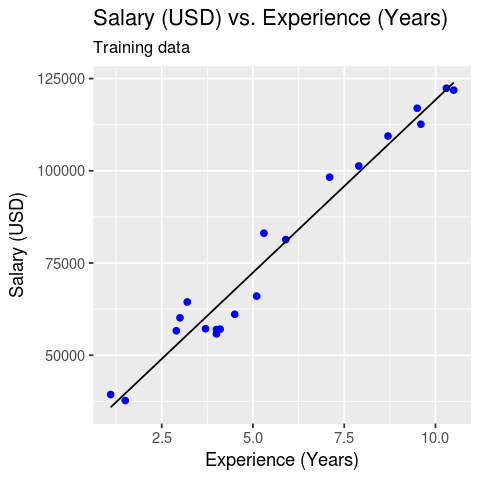

In [20]:
ggplot() +
    geom_point(aes(x = training_set$YearsExperience, y = training_set$Salary),
               colour = 'blue') +
    geom_line(aes(x=training_set$YearsExperience,y=predict(lin_reg,training_set)),
              colour='black') + 
    ggtitle('Salary (USD) vs. Experience (Years)',subtitle='Training data') +
    xlab('Experience (Years)') + 
    ylab('Salary (USD)')

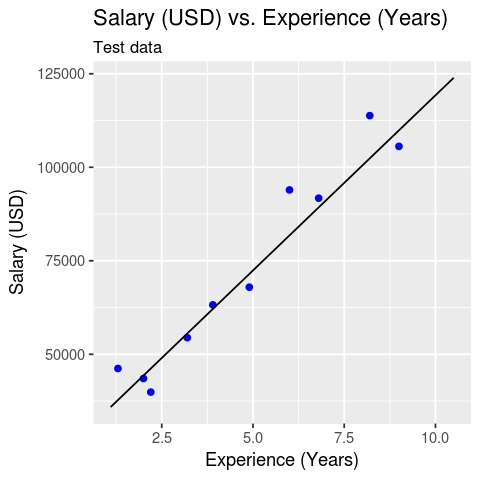

In [21]:
ggplot() +
    geom_point(aes(x = test_set$YearsExperience, y = test_set$Salary),
               colour = 'blue') +
    geom_line(aes(x=training_set$YearsExperience,y=predict(lin_reg,training_set)),
              colour='black') + 
    ggtitle('Salary (USD) vs. Experience (Years)',subtitle='Test data') +
    xlab('Experience (Years)') + 
    ylab('Salary (USD)')